In [121]:
from data_utils import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
dataset = ControlRelative("data/line5.csv", n_styles=5, seg_len=100, window=100, smooth_iterations=5, cutoff=(0,50))


Loaded 194 segments of style 0
Shape: (194, 2, 100)
Loaded 216 segments of style 1
Shape: (216, 2, 100)
Loaded 215 segments of style 2
Shape: (215, 2, 100)
Loaded 226 segments of style 3
Shape: (226, 2, 100)
Loaded 208 segments of style 4
Shape: (208, 2, 100)


Encoded style:  [0. 0. 0. 1. 0.]


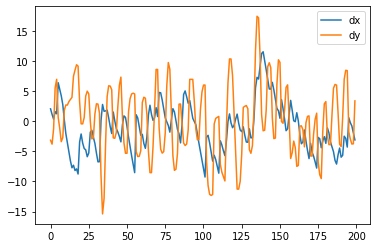

In [124]:
dataset.visualize_d(500)

Encoded style:  [0. 1. 0. 0. 0.]


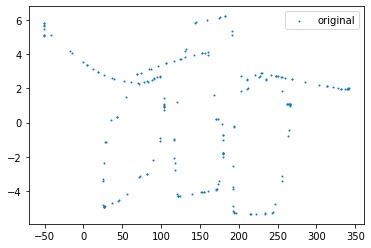

In [126]:
dataset.visualize(150)

Length =  611


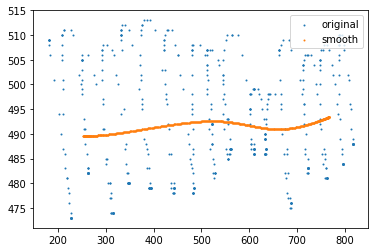

In [152]:
dataset.visualize_original(0,0)

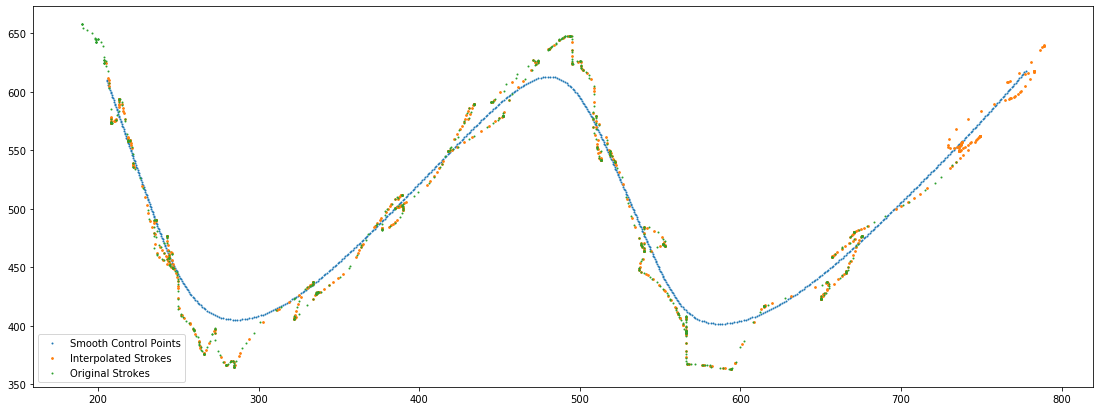

In [151]:
window = 70
smooth_iterations = 3
with open("data/guided5.csv") as f:
    f.readline() # discard first line
    for i in range(4):
        line = f.readline()
    index, style, pointx, pointy, controlx, controly = line.split(",")

    point_times = np.array([i for i in range(len(pointx))])
    pointx = np.array([float(i) for i in pointx.split(' ')], dtype=np.float32)
    pointy = np.array([float(i) for i in pointy.split(' ')], dtype=np.float32)

    # smooth with KZ filter
    smooth_times = kz(point_times, window, smooth_iterations)
    smoothx = kz(pointx, window, smooth_iterations)
    smoothy = kz(pointy, window, smooth_iterations)
    
    control, control_times, tangents = normalizeControl(smoothx, smoothy, smooth_times, 1.5)
    
    new_points_delta = straigtenStroke(pointx, pointy, point_times, control, control_times, tangents)
    dx = new_points_delta[:, 0]
    dy = new_points_delta[:, 1]
    bitangents = np.vstack([-tangents[:,1], tangents[:,0]]).T
    new_points = control + np.vstack([dx, dx]).T * tangents + np.vstack([dy, dy]).T * bitangents

plt.figure(figsize=(19,7))
k = len(new_points)
x = len(new_points)
plt.scatter(control[k-x:k, 0], control[k-x:k, 1], s=1, label="Smooth Control Points")
plt.scatter(new_points[k-x:k, 0], new_points[k-x:k, 1], s=3, label="Interpolated Strokes")
plt.scatter(pointx[k-x:k], pointy[k-x:k], s=1, label="Original Strokes")
plt.legend()

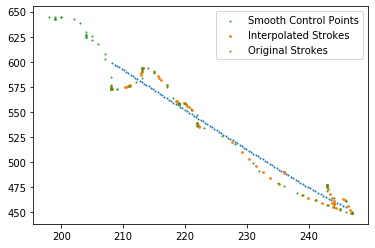

In [156]:
k = len(new_points) - 600
x = 100
plt.scatter(control[k-x:k, 0], control[k-x:k, 1], s=1, label="Smooth Control Points")
plt.scatter(new_points[k-x:k, 0], new_points[k-x:k, 1], s=3, label="Interpolated Strokes")
plt.scatter(pointx[k-x:k], pointy[k-x:k], s=1, label="Original Strokes")
plt.legend()

In [36]:
print(tangents)

[[ 0.42306415 -0.90609973]
 [ 0.42378915 -0.90576087]
 [ 0.42672275 -0.90438249]
 [ 0.43048895 -0.90259585]
 [ 0.4336745  -0.9010696 ]
 [ 0.43706326 -0.89943077]
 [ 0.44065419 -0.89767694]
 [ 0.44432787 -0.89586425]
 [ 0.4481113  -0.89397778]
 [ 0.45216034 -0.89193667]
 [ 0.45654852 -0.88969852]
 [ 0.46122387 -0.8872838 ]
 [ 0.46768279 -0.88389638]
 [ 0.47301906 -0.88105219]
 [ 0.47685455 -0.87898222]
 [ 0.49226559 -0.87044505]
 [ 0.48764189 -0.87304375]
 [ 0.4716181  -0.88180291]
 [ 0.47467804 -0.88015951]
 [ 0.47764825 -0.87855116]
 [ 0.48218925 -0.87606708]
 [ 0.48520868 -0.87439839]
 [ 0.48662341 -0.87361185]
 [ 0.48956328 -0.87196777]
 [ 0.49252091 -0.87030061]
 [ 0.4955098  -0.86860235]
 [ 0.49853438 -0.86686993]
 [ 0.50159344 -0.86510348]
 [ 0.50468359 -0.86330439]
 [ 0.50780489 -0.86147211]
 [ 0.51323152 -0.8582502 ]
 [ 0.51675712 -0.85613205]
 [ 0.51800807 -0.85537573]
 [ 0.52114233 -0.85346978]
 [ 0.52425317 -0.85156245]
 [ 0.52943747 -0.84834896]
 [ 0.53302789 -0.84609767]
 

In [20]:
i = 1
smoothxy = np.array([smoothx, smoothy]).T
print(distance(control[i], control[i+1]))
print(distance(smoothxy[i], smoothxy[i+1]))

1.5864375207837216
0.40703609143209923


In [2]:
dataset = Guided("data/guided5.csv", n_styles=5, seg_len=100, window=30, smooth_iterations=3, cutoff=20)

Loaded 2361 segments of style 0
Shape: (2361, 4, 100)
Loaded 1622 segments of style 1
Shape: (1622, 4, 100)
Loaded 2434 segments of style 2
Shape: (2434, 4, 100)
Loaded 1243 segments of style 3
Shape: (1243, 4, 100)
Loaded 981 segments of style 4
Shape: (981, 4, 100)


(200, 800)

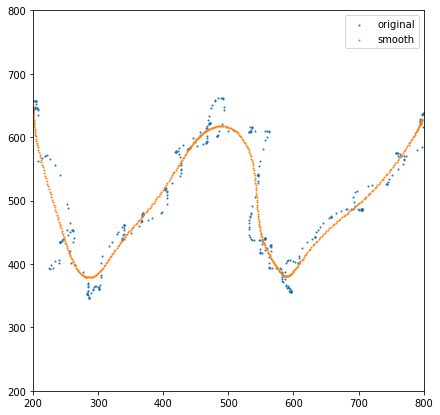

In [9]:
plt.figure(figsize=(7,7))
dataset.visualize_original(3,3)
plt.xlim((200, 800))
plt.ylim((200, 800))

Encoded style:  [1. 0. 0. 0. 0.]


(-200, 200)

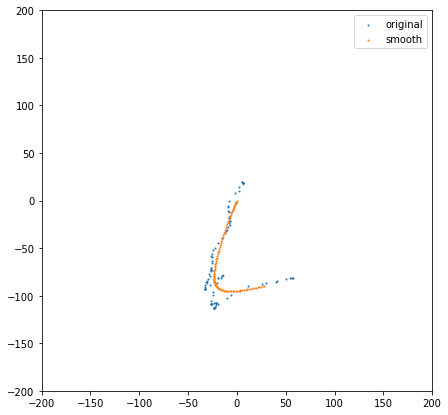

In [15]:
plt.figure(figsize=(7,7))
dataset.visualize(1200)
plt.xlim((-200, 200))
plt.ylim((-200, 200))

In [10]:
dataset = SmoothCurve("data/threecurves.csv")

Loaded 1715 segments of style 0
Shape: (1715, 4, 100)
Loaded 912 segments of style 1
Shape: (912, 4, 100)
Loaded 1469 segments of style 2
Shape: (1469, 4, 100)


Encoded style:  [1. 0. 0.]


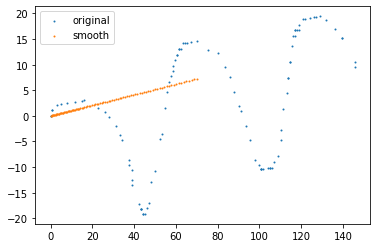

In [24]:
dataset.visualize(8)

Encoded style:  [1. 0. 0.]


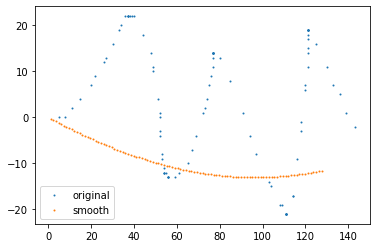

In [6]:
dataset.visualize(500)

In [5]:
with open("threecurves.csv") as f:
    # format:
    # id, style, pointx, pointy, controlx, controly
    f.readline() # discard first line
    while True:
        line = f.readline()
        if not line:
            break
        index, style, pointx, pointy, controlx, controly = line.split(",")
        style = int(style)

        pointx = np.array([float(i) for i in pointx.split(' ')], dtype=np.float32)
        pointy = np.array([float(i) for i in pointy.split(' ')], dtype=np.float32)
        controlx = np.array([float(i) for i in controlx.split(' ')], dtype=np.float32)
        controly = np.array([float(i) for i in controly.split(' ')], dtype=np.float32)
        assert len(pointx) == len(controly)
        assert len(pointy) == len(controlx)
        dx = pointx[1:] - pointx[:-1]
        dy = pointy[1:] - pointy[:-1]
        break

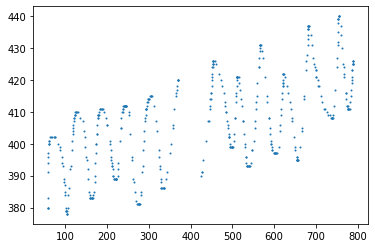

In [6]:
plt.scatter(pointx, pointy, s=1)

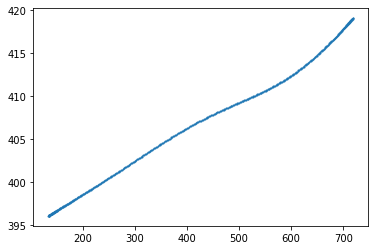

In [7]:
def kz2(series, window, iterations):
    z = pd.Series(series)
    for i in range(iterations):
        z = z.rolling(window, min_periods=1, center=True).mean()
    return z

w = 100
it = 5
new_x = kz2(pointx, w, it)
new_y = kz2(pointy, w, it)
plt.scatter(new_x, new_y, s=1)